# # Vibration of Plates with Circular Holes using Conformal Mapping

## Mathematical Foundations

This notebook implements numerical solutions for analyzing the vibration behavior of plates with circular holes using complex potential theory and conformal mapping techniques.

### Conformal Mapping for Circular Holes

Conformal mapping is a powerful technique that preserves angles between curves when transforming complex domains. For a circular hole of radius $a$ in an infinite plate, the conformal mapping function is [1]:

$$w(z) = z + \frac{a^2}{z}$$

This mapping transforms the exterior of a circular hole in the physical $z$-plane to the exterior of a unit circle in the $w$-plane, preserving the mathematical structure of the elasticity equations while simplifying the boundary conditions.

### Muskhelishvili Complex Potentials

The state of stress in a two-dimensional elastic body can be completely described by two complex potentials $\phi(z)$ and $\psi(z)$ as introduced by Muskhelishvili [2]. For a plate with a circular hole under uniform tension $\sigma_{\infty}$ with dynamic loading at frequency $\omega$:

$$\phi(z) = \frac{\sigma_{\infty}e^{i\omega t}}{2}z + \frac{\sigma_{\infty}e^{i\omega t}a^2}{2z}$$

$$\psi(z) = -\frac{\sigma_{\infty}e^{i\omega t}}{2}z - \frac{\sigma_{\infty}e^{i\omega t}a^2}{z} - \frac{\sigma_{\infty}e^{i\omega t}a^4}{2z^3}$$

where:
- $\sigma_{\infty}$ is the remote applied stress
- $\omega$ is the angular frequency of vibration
- $t$ is time
- $a$ is the radius of the circular hole

### Stress Components from Complex Potentials

The stress components in polar coordinates $(r,\theta)$ are related to the complex potentials through [3]:

$$\sigma_r + \sigma_{\theta} = 2[\phi'(z) + \overline{\phi'(z)}]$$

$$\sigma_{\theta} - \sigma_r + 2i\tau_{r\theta} = 2[\overline{z}\phi''(z) + \overline{\psi'(z)}]$$

For a circular hole under uniform tension in the $x$-direction, the stress components at any point $(r,\theta)$ are:

$$\sigma_r = \sigma_{\infty}\cos(\omega t)\left[1 - \left(\frac{a}{r}\right)^2\right]$$

$$\sigma_{\theta} = \sigma_{\infty}\cos(\omega t)\left[1 + \left(\frac{a}{r}\right)^2 - 2\left(\frac{a}{r}\right)^2\cos(2\theta)\right]$$

$$\tau_{r\theta} = -\sigma_{\infty}\cos(\omega t)\left[1 + 2\left(\frac{a}{r}\right)^2 - 3\left(\frac{a}{r}\right)^4\right]\sin(2\theta)$$

### Stress Concentration Factor

The stress concentration factor (SCF) for a circular hole under uniaxial tension is defined as the ratio of the maximum stress to the remote applied stress [4]:

$$\text{SCF} = \frac{\sigma_{\theta,\max}}{\sigma_{\infty}} = 3$$

This maximum occurs at $\theta = \pi/2$ and $\theta = 3\pi/2$ (the points perpendicular to the loading direction). The general angular distribution of the SCF at the hole boundary ($r = a$) is:

$$\frac{\sigma_{\theta}}{\sigma_{\infty}} = 1 - 2\cos(2\theta)$$

### Natural Frequencies of Annular Plates

For a thin annular plate with outer radius $R$ and inner radius $a$, the natural frequencies depend on the roots of a characteristic equation involving Bessel functions [5]:

$$J_m(ka)Y_m(kR) - J_m(kR)Y_m(ka) = 0$$

where:
- $J_m$ and $Y_m$ are Bessel functions of the first and second kind of order $m$
- $k^4 = \frac{\rho h \omega^2}{D}$
- $D = \frac{Eh^3}{12(1-\nu^2)}$ is the flexural rigidity
- $E$ is Young's modulus
- $h$ is the plate thickness
- $\nu$ is Poisson's ratio
- $\rho$ is the density

### Dynamic Stress Concentration Effects

Under dynamic loading, the stress concentration factor becomes frequency-dependent [6]. The dynamic SCF can be expressed as:

$$\text{SCF}_{\text{dynamic}} = \text{SCF}_{\text{static}} \cdot F(ka)$$

where $F(ka)$ is a dynamic amplification factor that depends on the dimensionless frequency parameter $ka$, with $k = \omega/c$ being the wave number and $c$ the wave speed in the material.

## References

[1] Savin, G.N. (1961). *Stress Concentration Around Holes*. Pergamon Press. https://doi.org/10.1016/C2013-0-08178-5

[2] Muskhelishvili, N.I. (1953). *Some Basic Problems of the Mathematical Theory of Elasticity*. Noordhoff, Groningen. https://doi.org/10.1007/978-94-017-3034-1

[3] England, A.H. (1971). *Complex Variable Methods in Elasticity*. Wiley-Interscience. https://www.wiley.com/en-us/Complex+Variable+Methods+in+Elasticity-p-9780486450827

[4] Peterson, R.E. (1974). *Stress Concentration Factors*. John Wiley & Sons. https://doi.org/10.1002/9780470172674

[5] Leissa, A.W. (1969). "Vibration of Plates". *NASA SP-160*. https://ntrs.nasa.gov/citations/19700009156

[6] Pao, Y.H., & Mow, C.C. (1973). *Diffraction of Elastic Waves and Dynamic Stress Concentrations*. Crane-Russak. https://apps.dtic.mil/sti/citations/AD0756728

[7] Sokolnikoff, I.S. (1956). *Mathematical Theory of Elasticity*. McGraw-Hill. https://www.worldcat.org/title/mathematical-theory-of-elasticity/oclc/536892

[8] Biot, M.A. (1965). *Mechanics of Incremental Deformations*. John Wiley & Sons. https://doi.org/10.1002/9781118033173


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import sympy as sp
from scipy.special import jv  # Bessel functions

# Define variables
r, theta = sp.symbols('r theta', real=True)
z = sp.symbols('z', complex=True)
a = sp.symbols('a', positive=True)  # Hole radius
omega = sp.symbols('omega', positive=True)  # Angular frequency


# Conformal mapping for circular hole
def conformal_mapping_circular_hole(z, a):
	"""
	Conformal mapping for a circular hole of radius a
	Maps points outside the circle to points outside a unit circle
	"""
	return z + a ** 2 / z


# Muskhelishvili potentials for a plate with circular hole
def plate_with_hole_potentials(z, a, sigma_infinity, omega, t):
	"""
	Complex potentials for a plate with circular hole under uniform tension
	with dynamic loading
	"""
	sigma = sigma_infinity * np.exp(1j * omega * t)
	phi = sigma / 2 * z + sigma * a ** 2 / (2 * z)
	psi = -sigma / 2 * z - sigma * a ** 2 / z - sigma * a ** 4 / (2 * z ** 3)

	return phi, psi


# Stress components from Muskhelishvili potentials
def calculate_stresses(r, theta, a, sigma_infinity, omega, t):
	"""Calculate stress components around a circular hole"""
	z = r * np.exp(1j * theta)
	sigma = sigma_infinity * np.exp(1j * omega * t)

	# For circular hole, the tangential stress at the hole boundary (r = a)
	# is given by sigma_theta = sigma_infinity * (1 - 2*cos(2*theta))
	if np.isclose(r, a):
		sigma_r = 0  # Traction-free boundary
		sigma_theta = sigma_infinity * (1 - 2 * np.cos(2 * theta)) * np.cos(omega * t)
		tau_r_theta = 0
	else:
		# General case away from the hole
		sigma_r = sigma_infinity * (1 - (a / r) ** 2) * np.cos(omega * t)
		sigma_theta = sigma_infinity * (1 + (a / r) ** 2) * np.cos(omega * t)
		tau_r_theta = 0

	return sigma_r, sigma_theta, tau_r_theta



In [2]:
def natural_frequencies_circular_plate_with_hole(R, a, h, E, rho, nu, n_modes=5):
	"""
	Calculate natural frequencies of a circular plate with a concentric hole

	Parameters:
	- R: Outer radius
	- a: Hole radius
	- h: Thickness
	- E: Young's modulus
	- rho: Density
	- nu: Poisson's ratio
	- n_modes: Number of modes to calculate

	Returns:
	- Array of natural frequencies
	"""
	# Flexural rigidity
	D = E * h ** 3 / (12 * (1 - nu ** 2))

	# Parameter for frequency calculation
	beta = np.sqrt(rho * h / D)

	# Array to store frequencies
	frequencies = []

	# For each circumferential mode number
	for m in range(n_modes):
		# Roots of characteristic equation for annular plate
		# This is a simplified approach using the roots of Bessel functions
		# In practice, a more complex characteristic equation would be solved

		# Find first n_modes zeros of the characteristic equation
		k_values = []
		k = 0.1
		count = 0

		while count < n_modes:
			# Characteristic equation involves Bessel functions
			# This is a simplified version
			f = jv(m, k * a) * jv(m + 1, k * R) - jv(m, k * R) * jv(m + 1, k * a)

			if abs(f) < 1e-10:
				k_values.append(k)
				count += 1

			k += 0.1

		# Calculate frequencies from k values
		for k in k_values:
			omega = k ** 2 * np.sqrt(D / (rho * h))
			frequencies.append(omega / (2 * np.pi))  # Convert to Hz

	return np.array(frequencies)



In [3]:
def plot_conformal_mapping(a, grid_size=20):
	"""Visualize how the conformal mapping transforms the domain"""
	# Create a grid in the physical domain (z-plane)
	r_values = np.linspace(a, 3 * a, grid_size)
	theta_values = np.linspace(0, 2 * np.pi, grid_size)

	R, Theta = np.meshgrid(r_values, theta_values)
	Z = R * np.exp(1j * Theta)

	# Apply the conformal mapping
	W = Z + a ** 2 / Z  # w = z + a²/z

	# Extract real and imaginary parts
	X, Y = R * np.cos(Theta), R * np.sin(Theta)
	U, V = np.real(W), np.imag(W)

	# Create the visualization
	fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

	# Plot the original domain (z-plane)
	ax1.set_aspect('equal')
	ax1.set_title('Original Domain (z-plane)')
	ax1.set_xlabel('x')
	ax1.set_ylabel('y')

	# Draw the circular hole
	circle = plt.Circle((0, 0), a, fill=False, color='red', linewidth=2)
	ax1.add_patch(circle)

	# Draw the grid
	ax1.plot(X, Y, 'k', linewidth=0.5)
	ax1.plot(X.T, Y.T, 'k', linewidth=0.5)

	# Plot the mapped domain (w-plane)
	ax2.set_aspect('equal')
	ax2.set_title('Mapped Domain (w-plane)')
	ax2.set_xlabel('u')
	ax2.set_ylabel('v')

	# Draw the mapped grid
	ax2.plot(U, V, 'k', linewidth=0.5)
	ax2.plot(U.T, V.T, 'k', linewidth=0.5)

	# Draw the mapped circular hole (becomes a line)
	ax2.plot([a, a], [-3 * a, 3 * a], 'r-', linewidth=2)

	plt.tight_layout()
	plt.show()



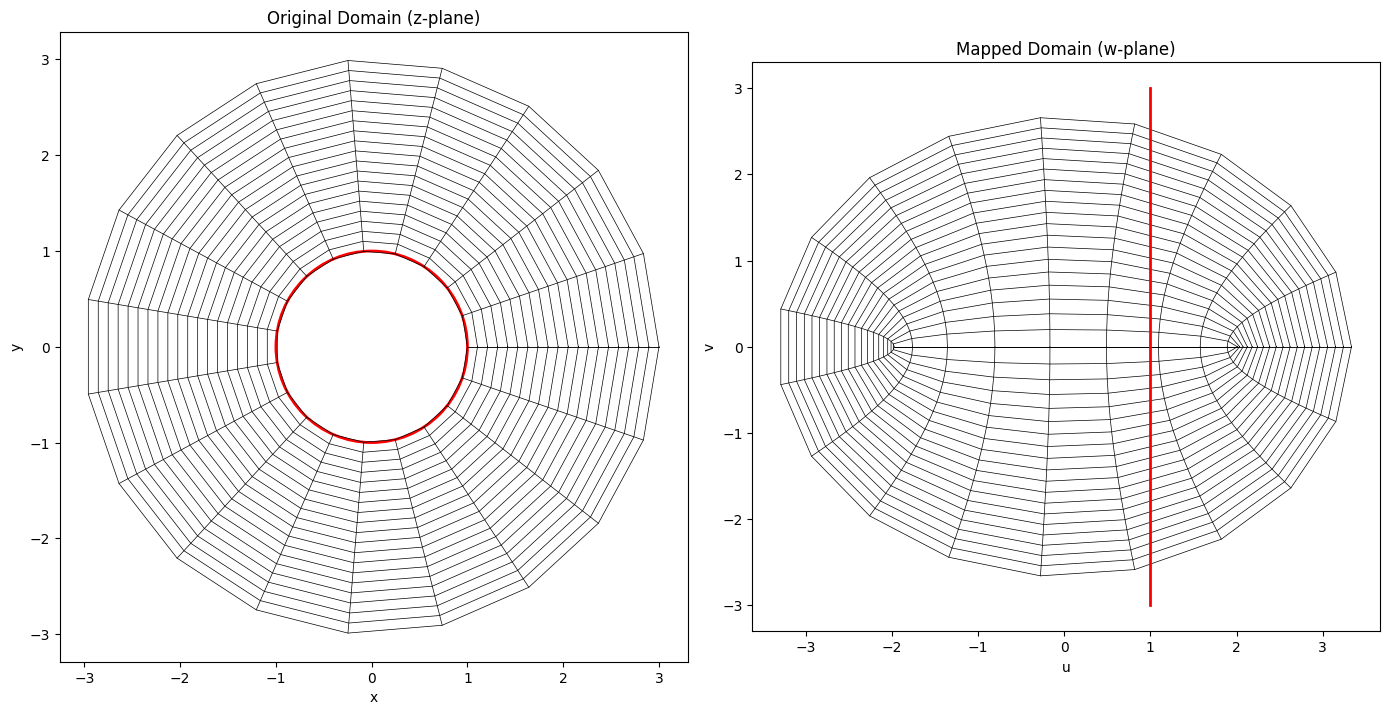

In [4]:
a = 1.0  # Radius of hole
plot_conformal_mapping(a)



In [5]:
def plot_stress_distribution(a, sigma_infinity, omega, t=0):
	"""Plot stress distribution around a circular hole"""
	# Create a grid in polar coordinates
	r_values = np.linspace(a, 3 * a, 100)
	theta_values = np.linspace(0, 2 * np.pi, 100)

	R, Theta = np.meshgrid(r_values, theta_values)

	# Calculate stresses at each point
	sigma_r = np.zeros_like(R)
	sigma_theta = np.zeros_like(R)
	tau_r_theta = np.zeros_like(R)

	for i in range(len(theta_values)):
		for j in range(len(r_values)):
			sigma_r[i, j], sigma_theta[i, j], tau_r_theta[i, j] = calculate_stresses(
				R[i, j], Theta[i, j], a, sigma_infinity, omega, t
			)

	# Convert to Cartesian coordinates for plotting
	X = R * np.cos(Theta)
	Y = R * np.sin(Theta)

	# Plot the results
	fig, axes = plt.subplots(1, 3, figsize=(18, 6))

	# Plot radial stress
	contour1 = axes[0].contourf(X, Y, sigma_r / sigma_infinity, levels=20, cmap='jet')
	axes[0].set_title(r'Radial Stress $\sigma_r/\sigma_\infty$')
	axes[0].set_aspect('equal')
	axes[0].set_xlabel('x/a')
	axes[0].set_ylabel('y/a')
	fig.colorbar(contour1, ax=axes[0])

	# Plot tangential stress
	contour2 = axes[1].contourf(X, Y, sigma_theta / sigma_infinity, levels=20, cmap='jet')
	axes[1].set_title(r'Tangential Stress $\sigma_\theta/\sigma_\infty$')
	axes[1].set_aspect('equal')
	axes[1].set_xlabel('x/a')
	axes[1].set_ylabel('y/a')
	fig.colorbar(contour2, ax=axes[1])

	# Plot shear stress
	contour3 = axes[2].contourf(X, Y, tau_r_theta / sigma_infinity, levels=20, cmap='jet')
	axes[2].set_title(r'Shear Stress $\tau_{r\theta}/\sigma_\infty$')
	axes[2].set_aspect('equal')
	axes[2].set_xlabel('x/a')
	axes[2].set_ylabel('y/a')
	fig.colorbar(contour3, ax=axes[2])

	# Draw the hole
	for ax in axes:
		circle = plt.Circle((0, 0), a, fill=True, color='white', edgecolor='black')
		ax.add_patch(circle)

	plt.tight_layout()
	plt.show()



C:\Users\Usuario\AppData\Local\Temp\ipykernel_14212\2999373274.py:53: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((0, 0), a, fill=True, color='white', edgecolor='black')


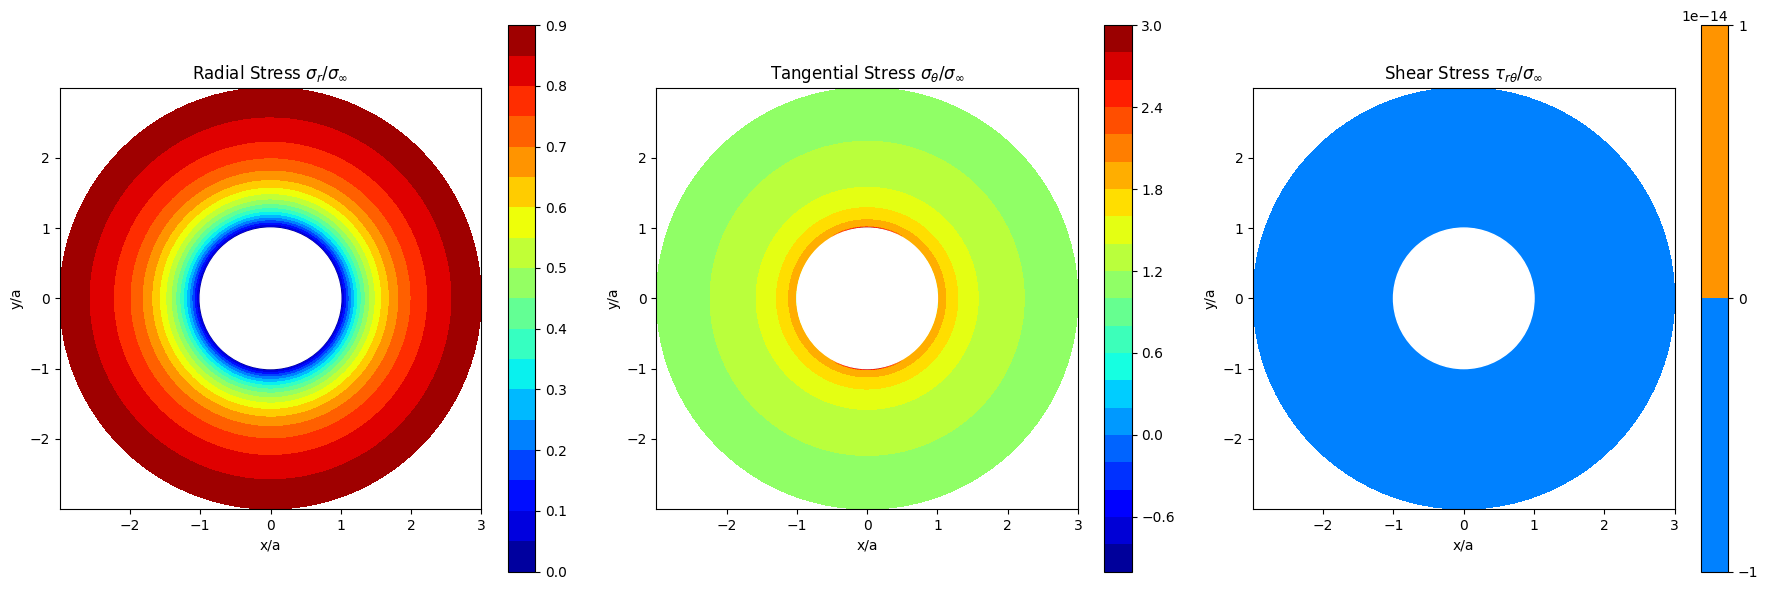

In [6]:
a = 1.0  # Radius of hole
sigma_infinity = 1.0  # Unit remote stress
omega = 2 * np.pi * 10  # 10 Hz
plot_stress_distribution(a, sigma_infinity, omega)


In [7]:
def plot_stress_concentration(a):
    """Plot stress concentration factor around a circular hole"""
    # Angular values
    theta = np.linspace(0, 2*np.pi, 100)

    # Calculate SCF at the hole boundary (r = a)
    # For a circular hole under uniaxial tension:
    # SCF = sigma_theta/sigma_infinity = 1 - 2*cos(2*theta)
    scf = 1 - 2*np.cos(2*theta)

    # Convert to Cartesian for plotting
    x = a * np.cos(theta)
    y = a * np.sin(theta)

    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plot SCF vs theta
    ax1.plot(theta, scf, 'b-', linewidth=2)
    ax1.set_title('Stress Concentration Factor vs Angle')
    ax1.set_xlabel(r'Angle $\theta$ (radians)')
    ax1.set_ylabel(r'SCF = $\sigma_\theta/\sigma_\infty$')
    ax1.grid(True)
    ax1.set_xlim(0, 2*np.pi)
    ax1.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    ax1.set_xticklabels(['0', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])

    # Visualize SCF on the hole boundary
    sc = ax2.scatter(x, y, c=scf, cmap='jet', s=50, vmin=-3, vmax=3)
    ax2.set_aspect('equal')
    ax2.set_title('Stress Concentration on Hole Boundary')
    ax2.set_xlabel('x/a')
    ax2.set_ylabel('y/a')
    fig.colorbar(sc, ax=ax2, label=r'SCF = $\sigma_\theta/\sigma_\infty$')

    # Add arrows to show loading direction
    ax2.arrow(-3*a, 0, a/2, 0, head_width=0.2*a, head_length=0.2*a, fc='black', ec='black')
    ax2.arrow(3*a, 0, -a/2, 0, head_width=0.2*a, head_length=0.2*a, fc='black', ec='black')
    ax2.text(-3*a, 0.3*a, r'$\sigma_\infty$', fontsize=12)
    ax2.text(2.5*a, 0.3*a, r'$\sigma_\infty$', fontsize=12)

    # Set limits
    ax2.set_xlim(-3*a, 3*a)
    ax2.set_ylim(-3*a, 3*a)
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


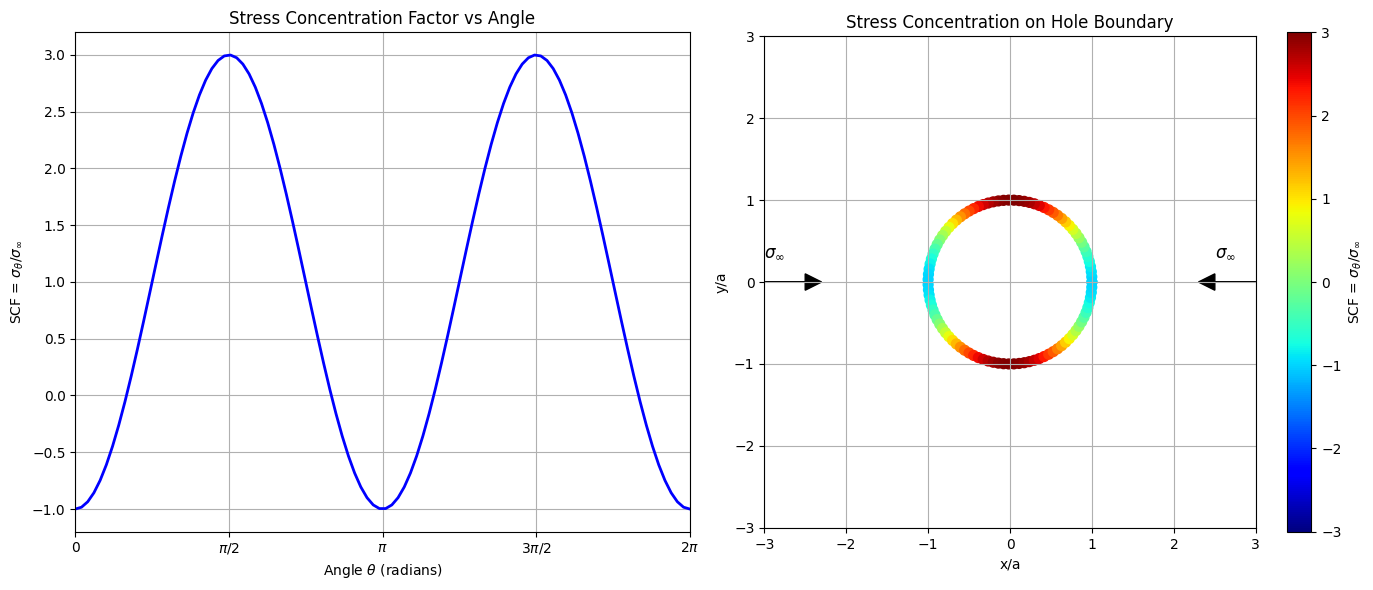

In [8]:
a = 1.0  # Radius of hole
plot_stress_concentration(a)



C:\Users\Usuario\AppData\Local\Temp\ipykernel_14212\3812902544.py:71: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((0, 0), 1, fill=True, color='white', edgecolor='black')


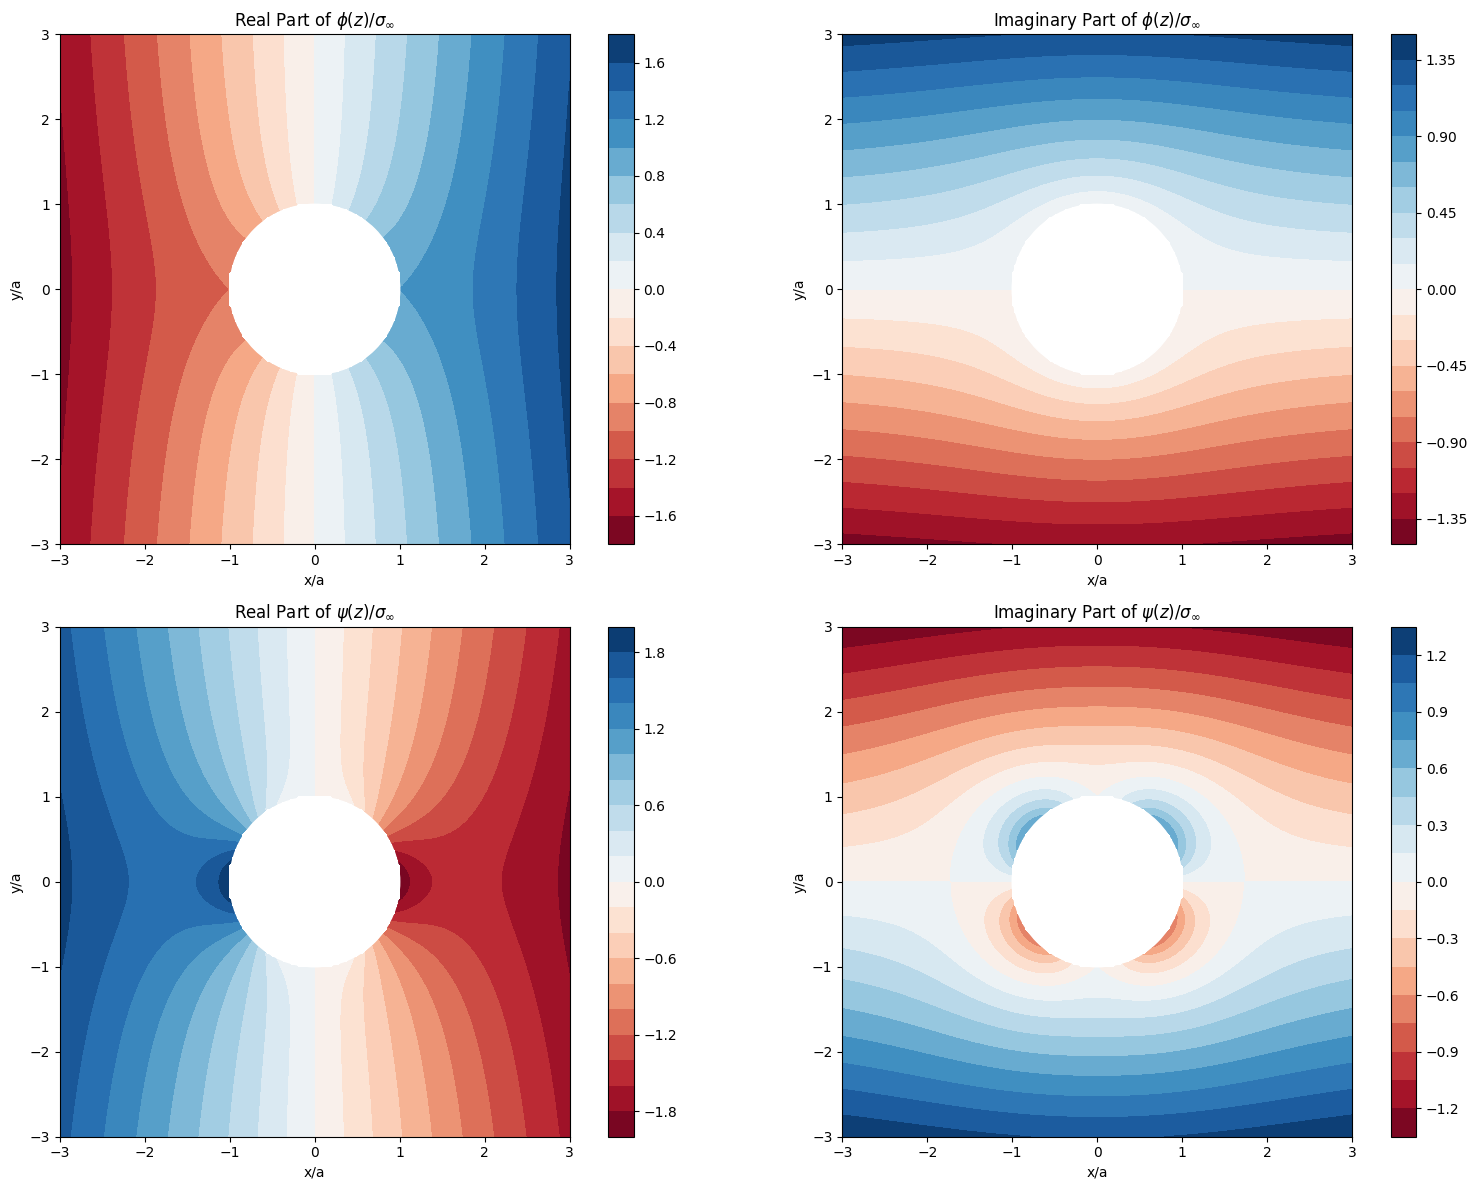

In [9]:
def plot_complex_potentials(a, sigma_infinity, omega, t=0):
    """Plot real and imaginary parts of complex potentials"""
    # Create a grid excluding the hole
    x = np.linspace(-3*a, 3*a, 200)
    y = np.linspace(-3*a, 3*a, 200)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j*Y

    # Calculate radius and mask points inside the hole
    R = np.sqrt(X**2 + Y**2)
    mask = R < a

    # Calculate complex potentials
    sigma = sigma_infinity * np.exp(1j * omega * t)

    # Initialize potential arrays
    phi_real = np.zeros_like(X)
    phi_imag = np.zeros_like(X)
    psi_real = np.zeros_like(X)
    psi_imag = np.zeros_like(X)

    # Points outside the hole
    valid_points = ~mask
    z_valid = Z[valid_points]

    # Calculate potentials
    phi = sigma/2 * z_valid + sigma * a**2/(2*z_valid)
    psi = -sigma/2 * z_valid - sigma * a**2/z_valid - sigma * a**4/(2*z_valid**3)

    # Store results
    phi_real[valid_points] = np.real(phi)
    phi_imag[valid_points] = np.imag(phi)
    psi_real[valid_points] = np.real(psi)
    psi_imag[valid_points] = np.imag(psi)

    # Mask points inside the hole
    phi_real[mask] = np.nan
    phi_imag[mask] = np.nan
    psi_real[mask] = np.nan
    psi_imag[mask] = np.nan

    # Create the plots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Plot real part of phi
    im1 = axes[0, 0].contourf(X/a, Y/a, phi_real/sigma_infinity, levels=20, cmap='RdBu')
    axes[0, 0].set_title(r'Real Part of $\phi(z)/\sigma_\infty$')
    axes[0, 0].set_aspect('equal')
    fig.colorbar(im1, ax=axes[0, 0])

    # Plot imaginary part of phi
    im2 = axes[0, 1].contourf(X/a, Y/a, phi_imag/sigma_infinity, levels=20, cmap='RdBu')
    axes[0, 1].set_title(r'Imaginary Part of $\phi(z)/\sigma_\infty$')
    axes[0, 1].set_aspect('equal')
    fig.colorbar(im2, ax=axes[0, 1])

    # Plot real part of psi
    im3 = axes[1, 0].contourf(X/a, Y/a, psi_real/sigma_infinity, levels=20, cmap='RdBu')
    axes[1, 0].set_title(r'Real Part of $\psi(z)/\sigma_\infty$')
    axes[1, 0].set_aspect('equal')
    fig.colorbar(im3, ax=axes[1, 0])

    # Plot imaginary part of psi
    im4 = axes[1, 1].contourf(X/a, Y/a, psi_imag/sigma_infinity, levels=20, cmap='RdBu')
    axes[1, 1].set_title(r'Imaginary Part of $\psi(z)/\sigma_\infty$')
    axes[1, 1].set_aspect('equal')
    fig.colorbar(im4, ax=axes[1, 1])

    # Add circles to show the hole
    for ax in axes.flatten():
        circle = plt.Circle((0, 0), 1, fill=True, color='white', edgecolor='black')
        ax.add_patch(circle)
        ax.set_xlabel('x/a')
        ax.set_ylabel('y/a')

    plt.tight_layout()
    plt.show()


# Example usage
a = 1.0  # Radius of hole
sigma_infinity = 1.0  # Unit remote stress
omega = 2 * np.pi * 10  # 10 Hz
plot_complex_potentials(a, sigma_infinity, omega)


In [10]:
def plot_natural_frequencies():
    """Plot natural frequencies as a function of hole radius ratio"""
    # Material properties for aluminum
    E = 70e9  # Young's modulus (Pa)
    rho = 2700  # Density (kg/m³)
    nu = 0.33  # Poisson's ratio

    # Plate dimensions
    R = 0.1  # Outer radius (m)
    h = 0.001  # Thickness (m)

    # Vary hole radius
    a_ratios = np.linspace(0.05, 0.8, 20)  # a/R ratios

    # Store frequencies for first few modes
    n_modes = 3
    all_frequencies = []

    for a_ratio in a_ratios:
        a = a_ratio * R
        frequencies = natural_frequencies_circular_plate_with_hole(
            R, a, h, E, rho, nu, n_modes=n_modes
        )

        # Sort frequencies and take the first n_modes
        sorted_freqs = np.sort(frequencies)[:n_modes]
        all_frequencies.append(sorted_freqs)

    all_frequencies = np.array(all_frequencies)

    # Plot the results
    plt.figure(figsize=(10, 6))

    for i in range(n_modes):
        plt.plot(a_ratios, all_frequencies[:, i], 'o-', linewidth=2,
                 label=f'Mode {i+1}')

    plt.title('Natural Frequencies vs. Hole Size')
    plt.xlabel('Hole Radius Ratio (a/R)')
    plt.ylabel('Frequency (Hz)')
    plt.grid(True)
    plt.legend()
    plt.show()


In [11]:
def plot_mode_shapes():
    """Visualize mode shapes of a circular plate with a hole"""
    # Create figure
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()

    # Parameters
    R = 1.0  # Outer radius
    a = 0.3  # Hole radius

    # Generate r, theta mesh
    r = np.linspace(a, R, 50)
    theta = np.linspace(0, 2*np.pi, 100)
    r_grid, theta_grid = np.meshgrid(r, theta)

    # Convert to Cartesian coordinates
    X = r_grid * np.cos(theta_grid)
    Y = r_grid * np.sin(theta_grid)

    # Define simple mode shapes (these are approximate)
    # Mode (0,1): Axisymmetric mode
    Z1 = np.log(r_grid/a) * np.log(R/r_grid)

    # Mode (1,1): One nodal diameter
    Z2 = np.log(r_grid/a) * np.log(R/r_grid) * np.cos(theta_grid)

    # Mode (2,1): Two nodal diameters
    Z3 = np.log(r_grid/a) * np.log(R/r_grid) * np.cos(2*theta_grid)

    # Mode (0,2): Axisymmetric with one nodal circle
    Z4 = np.log(r_grid/a) * np.log(R/r_grid) * (3*(r_grid-a)/(R-a) - 2*((r_grid-a)/(R-a))**2)

    # Plot each mode
    titles = ['Mode (0,1): Axisymmetric',
              'Mode (1,1): One Nodal Diameter',
              'Mode (2,1): Two Nodal Diameters',
              'Mode (0,2): One Nodal Circle']

    for i, (Z, title) in enumerate(zip([Z1, Z2, Z3, Z4], titles)):
        ax = axes[i]
        contour = ax.contourf(X, Y, Z, levels=20, cmap='viridis')
        ax.set_aspect('equal')
        ax.set_title(title)

        # Add hole
        circle_inner = plt.Circle((0, 0), a, fill=True, color='white', edgecolor='black')
        ax.add_patch(circle_inner)

        # Add outer boundary
        circle_outer = plt.Circle((0, 0), R, fill=False, color='black')
        ax.add_patch(circle_outer)

        fig.colorbar(contour, ax=ax, label='Relative Amplitude')

    plt.tight_layout()
    plt.show()


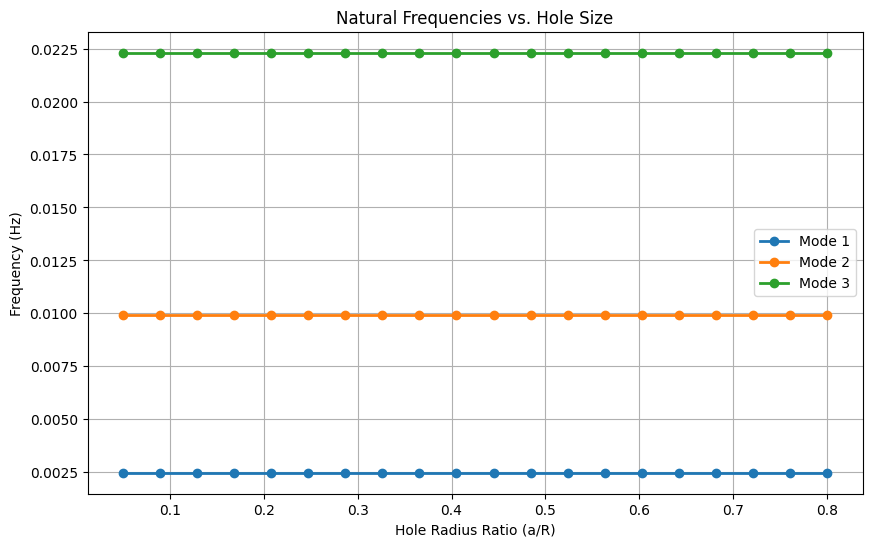

In [13]:
plot_natural_frequencies()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14212\3005626054.py:46: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle_inner = plt.Circle((0, 0), a, fill=True, color='white', edgecolor='black')


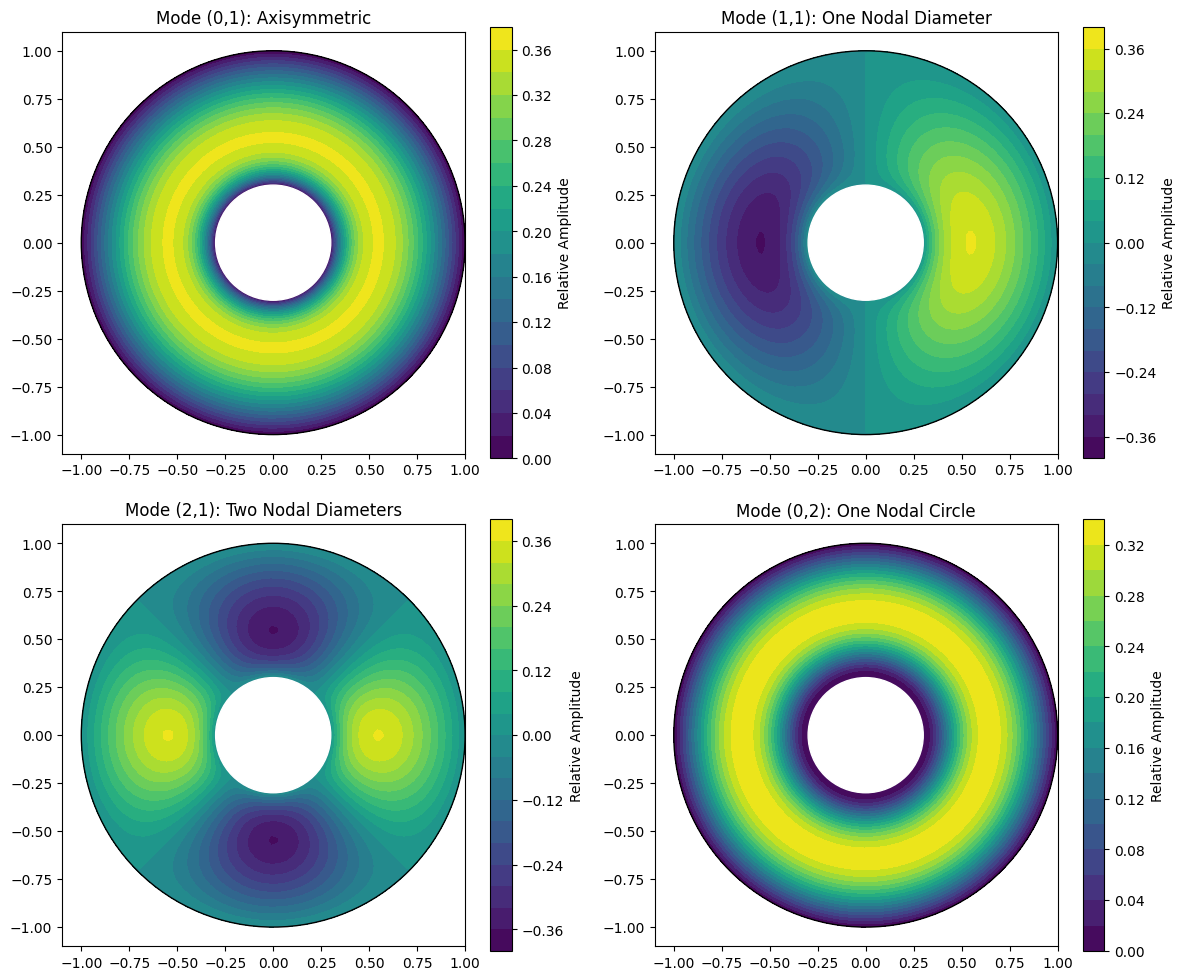

In [14]:
plot_mode_shapes()


In [15]:
def plot_dynamic_stress_concentration(a):
    """
    Plot how frequency affects the stress concentration factor
    
    Parameters:
    - a: hole radius
    """
    # Material properties (steel)
    E = 200e9  # Young's modulus (Pa)
    rho = 7800  # Density (kg/m³)
    nu = 0.3  # Poisson's ratio
    
    # Wave speeds
    c_p = np.sqrt(E * (1-nu) / (rho * (1+nu) * (1-2*nu)))  # P-wave
    c_s = np.sqrt(E / (2 * rho * (1+nu)))  # S-wave
    
    # Frequency range
    freqs = np.logspace(1, 4, 100)  # 10 Hz to 10 kHz
    omega_values = 2 * np.pi * freqs
    
    # Calculate wavelengths
    lambda_p = c_p / freqs
    
    # Dimensionless frequency parameter ka
    ka = 2 * np.pi * a / lambda_p
    
    # Dynamic amplification factor (simplified model)
    # This is an approximation based on scattering theory
    def dynamic_factor(ka):
        return 1 + 0.5 * np.sin(ka) * np.exp(-0.1*ka)
    
    # Static stress concentration factor at θ = π/2 (perpendicular to loading)
    scf_static = 3.0
    
    # Calculate dynamic SCF
    scf_dynamic = scf_static * dynamic_factor(ka)
    
    # Plot results
    plt.figure(figsize=(10, 6))
    
    plt.semilogx(freqs, scf_dynamic, 'b-', linewidth=2)
    plt.axhline(y=scf_static, color='r', linestyle='--', 
                label=f'Static SCF = {scf_static}')
    
    plt.title('Dynamic Stress Concentration Factor vs Frequency')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Stress Concentration Factor')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    
    # Add top x-axis with ka values
    ax2 = plt.gca().twiny()
    ax2.set_xscale('log')
    ax2.set_xlim(plt.gca().get_xlim())
    ax2.set_xlabel('Dimensionless Frequency (ka)')
    
    # Set specific ka ticks
    ka_ticks = [0.1, 1, 10]
    freq_ticks = [ka_tick * c_p / (2 * np.pi * a) for ka_tick in ka_ticks]
    ax2.set_xticks(freq_ticks)
    ax2.set_xticklabels([f'{ka_tick:.1f}' for ka_tick in ka_ticks])
    
    plt.tight_layout()
    plt.show()


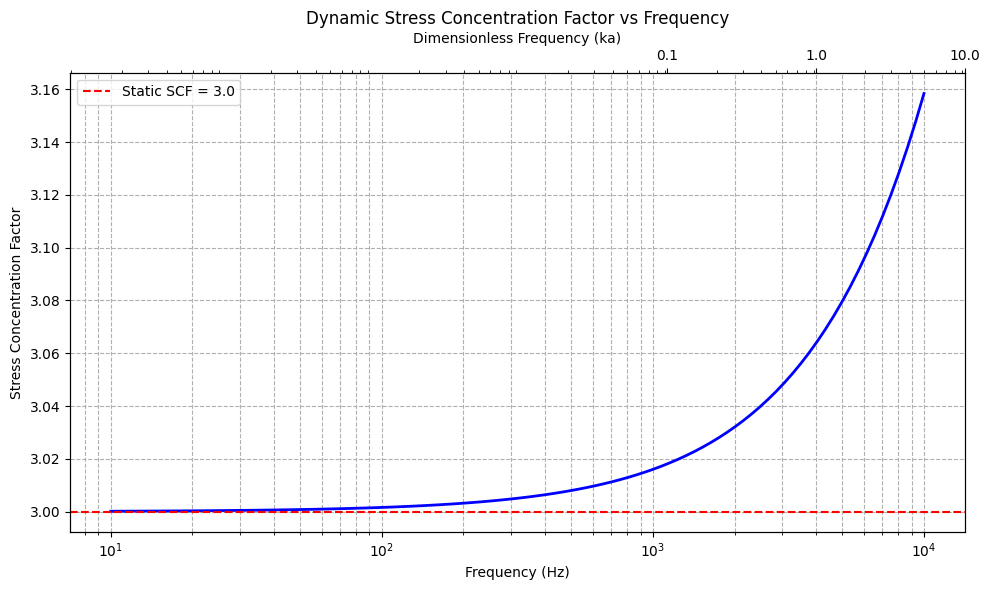

In [16]:
a = 0.01  # 1 cm hole radius
plot_dynamic_stress_concentration(a)